Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   o

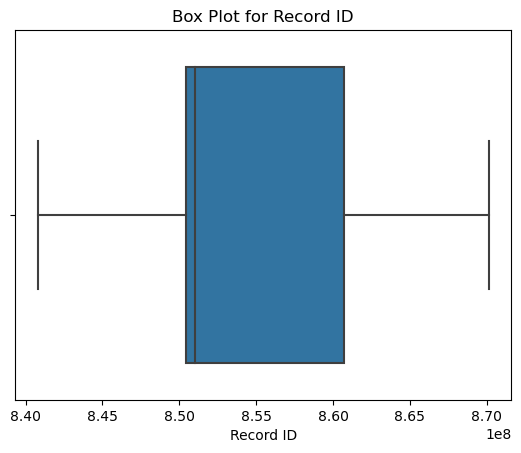

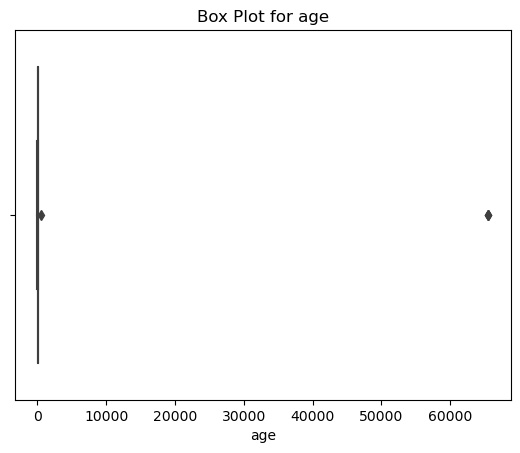


Mean of Numeric Columns:
Record ID    8.529473e+08
age          7.355582e+01
dtype: float64

Variance of Numeric Columns:
Record ID    5.748625e+13
age          1.401801e+06
dtype: float64

Standard Deviation of Numeric Columns:
Record ID    7.581969e+06
age          1.183977e+03
dtype: float64


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the file
file_path = r'C:\Users\year3\Downloads\Lab Session Data.xlsx'

try:
    # Load the dataset
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
    
    # Display basic information about the dataset
    print("Basic Information:")
    print(df.info())
    print("\nFirst few rows of the dataset:")
    print(df.head())

    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\nCategorical Columns:")
    print(categorical_cols)

    # Check unique values in each categorical column
    print("\nUnique values in categorical columns:")
    for col in categorical_cols:
        print(f"{col}: {df[col].unique()}")

    # Determine encoding scheme
    # For demonstration purposes, assuming ordinal variables are identified manually
    # Example: Assuming 'Education Level' is ordinal and others are nominal
    ordinal_cols = ['Education Level']  # Example list
    nominal_cols = list(set(categorical_cols) - set(ordinal_cols))
    print("\nOrdinal Columns:")
    print(ordinal_cols)
    print("\nNominal Columns:")
    print(nominal_cols)

    # Data range for numeric variables
    print("\nNumeric Data Range:")
    print(df.describe())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Identify outliers using IQR method
    numeric_cols = df.select_dtypes(include=['number']).columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
    print("\nOutliers count:")
    print(outliers.sum())

    # Box plots for numeric columns to visualize outliers
    print("\nBox Plots for Numeric Columns:")
    for col in numeric_cols:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot for {col}')
        plt.show()

    # Calculate mean and variance (or standard deviation)
    print("\nMean of Numeric Columns:")
    print(df[numeric_cols].mean())

    print("\nVariance of Numeric Columns:")
    print(df[numeric_cols].var())

    print("\nStandard Deviation of Numeric Columns:")
    print(df[numeric_cols].std())

except FileNotFoundError:
    print(f"Error: The file at path '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")
